In [9]:
import numpy as np
import scipy.io as sio
import pandas as pd

# Define file paths for EEG data
file_paths = {
    'MC': 'MC.mat',
    'MADHD': 'MADHD.mat',
    'FC': 'FC.mat',
    'FADHD': 'FADHD.mat'
}

# Parameters
segment_length = 1280  # Assumed length of one segment
num_points_to_show = 5  # Show first 5 time points

# Load and display snippets for each file
for label, path in file_paths.items():
    try:
        # Load the .mat file
        data = sio.loadmat(path)
        print(f'\nProcessing {label}.mat')
        print(f'Shape of {label}: {data[label].shape}')
        print(f'Shape of first element: {data[label][0, 0].shape}')

        # Extract the first segment (index 0), first 1280 points, all channels
        start_idx = 0
        end_idx = start_idx + segment_length
        segment = data[label][0, 0][0, start_idx:end_idx, :]  # Shape: (1280, 2)

        # Take the first 5 time points
        snippet = segment[:num_points_to_show, :]  # Shape: (5, 2)

        # Create a DataFrame for the table
        df = pd.DataFrame({
            'Time Point': np.arange(num_points_to_show),
            'Channel 1 (µV)': snippet[:, 0],
            'Channel 2 (µV)': snippet[:, 1]
        })

        # Display the table
        print(f'\nRaw Data Snippet for {label} (First Segment, First {num_points_to_show} Time Points):')
        print(df.to_string(index=False))

    except Exception as e:
        print(f'Error processing {path}: {e}')


Processing MC.mat
Shape of MC: (1, 11)
Shape of first element: (29, 7680, 2)

Raw Data Snippet for MC (First Segment, First 5 Time Points):
 Time Point  Channel 1 (µV)  Channel 2 (µV)
          0          12.189          -7.197
          1           6.171         -19.914
          2          -8.134           1.906
          3         -11.752          29.563
          4          -2.820          26.123

Processing MADHD.mat
Shape of MADHD: (1, 11)
Shape of first element: (27, 7680, 2)

Raw Data Snippet for MADHD (First Segment, First 5 Time Points):
 Time Point  Channel 1 (µV)  Channel 2 (µV)
          0          40.215          13.815
          1          48.944          35.103
          2           8.819          35.173
          3         -23.570          11.710
          4          -5.783          -7.405

Processing FC.mat
Shape of FC: (1, 11)
Shape of first element: (13, 7680, 2)

Raw Data Snippet for FC (First Segment, First 5 Time Points):
 Time Point  Channel 1 (µV)  Channel 2 (


Contents of MC.mat: ['__header__', '__version__', '__globals__', 'MC']
Shape of MC: (1, 11)
First element type: <class 'numpy.ndarray'>, shape: (29, 7680, 2)
Shape of eeg_data[MC][0]: (1280, 2)

Contents of MADHD.mat: ['__header__', '__version__', '__globals__', 'MADHD']
Shape of MADHD: (1, 11)
First element type: <class 'numpy.ndarray'>, shape: (27, 7680, 2)
Shape of eeg_data[MADHD][0]: (1280, 2)

Contents of FC.mat: ['__header__', '__version__', '__globals__', 'FC']
Shape of FC: (1, 11)
First element type: <class 'numpy.ndarray'>, shape: (13, 7680, 2)
Shape of eeg_data[FC][0]: (1280, 2)

Contents of FADHD.mat: ['__header__', '__version__', '__globals__', 'FADHD']
Shape of FADHD: (1, 11)
First element type: <class 'numpy.ndarray'>, shape: (11, 7680, 2)
Shape of eeg_data[FADHD][0]: (1280, 2)


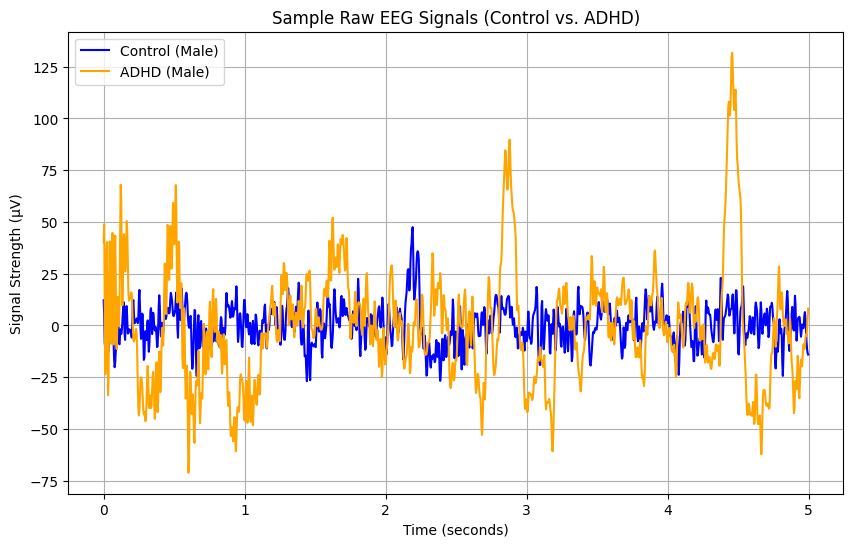

In [10]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Define file paths for EEG data
file_paths = {
    'MC': 'MC.mat',
    'MADHD': 'MADHD.mat',
    'FC': 'FC.mat',
    'FADHD': 'FADHD.mat'
}

# Load and inspect data
eeg_data = {}
for label, path in file_paths.items():
    try:
        data = sio.loadmat(path)
        print(f'\nContents of {label}.mat: {list(data.keys())}')
        print(f'Shape of {label}: {data[label].shape}')
        print(f'First element type: {type(data[label][0, 0])}, shape: {data[label][0, 0].shape}')
        # Extract segments: assume data[label][0, 0] is (11, 7680, 2), take first 1280 points per segment
        segment_length = 1280
        num_segments = 11
        eeg_data[label] = []
        for i in range(num_segments):
            start_idx = i * segment_length
            end_idx = (i + 1) * segment_length
            segment = data[label][0, 0][i, start_idx:end_idx, :]  # Shape: (1280, 2)
            eeg_data[label].append(segment)
        print(f'Shape of eeg_data[{label}][0]: {eeg_data[label][0].shape}')
    except Exception as e:
        print(f'Error loading {path}: {e}')

# Plot a sample signal
if eeg_data:
    try:
        # Take the first channel of the first segment
        sample_control = eeg_data['MC'][0][:, 0]  # Shape: (1280,)
        sample_adhd = eeg_data['MADHD'][0][:, 0]  # Shape: (1280,)
        time_points = np.arange(len(sample_control)) / 256  # 256 Hz, 5 seconds
        plt.figure(figsize=(10, 6))
        plt.plot(time_points, sample_control, label='Control (Male)', color='blue')
        plt.plot(time_points, sample_adhd, label='ADHD (Male)', color='orange')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Signal Strength (µV)')
        plt.title('Sample Raw EEG Signals (Control vs. ADHD)')
        plt.legend()
        plt.grid(True)
        plt.savefig('raw_eeg_corrected.png')
        plt.show()
    except Exception as e:
        print(f'Error plotting data: {e}')
else:
    print("No data loaded; please check file paths.")

Baseline feature matrix shape: (20, 2), Labels shape: (20,)


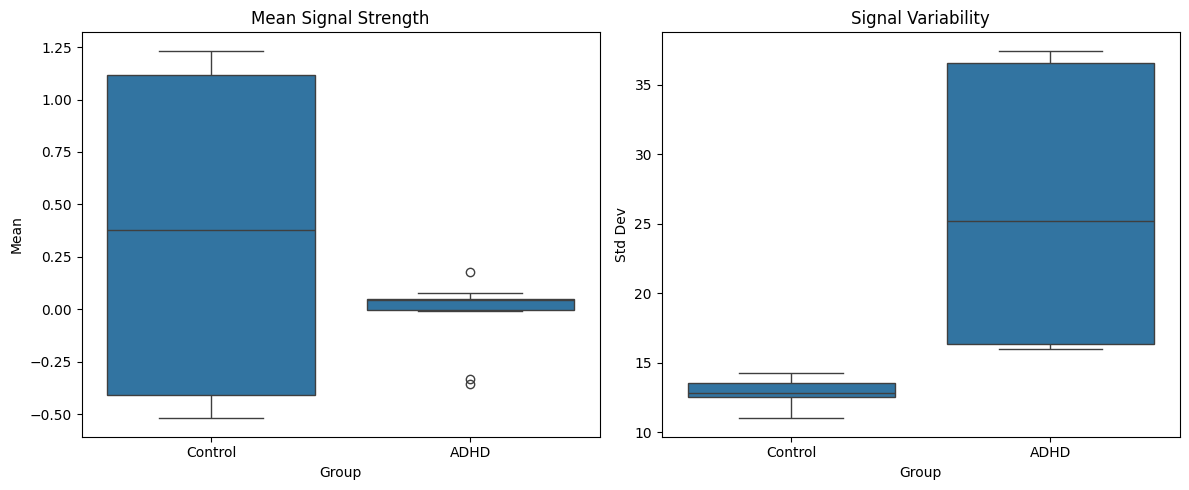

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def extract_baseline_features(eeg_segments):
    """Extract mean and std features from EEG segments."""
    feature_list = []
    for segment in eeg_segments:
        # Treat each segment as a 1D array
        for i in range(len(segment)):
            signal = segment[i].flatten()
            mean_feat = np.mean(signal)
            std_feat = np.std(signal)
            features = [mean_feat, std_feat]
            feature_list.append(features)
    return np.array(feature_list)

# Build feature matrix and labels
X_baseline = []
y_baseline = []
for label, segments in eeg_data.items():
    features = extract_baseline_features(segments)
    X_baseline.append(features)
    y_baseline.extend([0 if label in ['MC', 'FC'] else 1] * features.shape[0])
X_baseline = np.vstack(X_baseline)
y_baseline = np.array(y_baseline)
print(f'Baseline feature matrix shape: {X_baseline.shape}, Labels shape: {y_baseline.shape}')

# Visualize feature distributions
df = pd.DataFrame(X_baseline, columns=['Mean', 'Std'])
df['Group'] = ['Control' if label == 0 else 'ADHD' for label in y_baseline]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Mean', data=df)
plt.title('Mean Signal Strength')
plt.ylabel('Mean')
plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Std', data=df)
plt.title('Signal Variability')
plt.ylabel('Std Dev')
plt.tight_layout()
plt.show()
plt.savefig('baseline_features.png')

In [3]:
import numpy as np
import scipy.signal as scipy_signal  # Explicit import to avoid conflict

def extract_spectral_features(eeg_segments, fs=256):
    """Extract mean, std, and spectral features (alpha, theta power) from EEG segments.
    
    Parameters:
    - eeg_segments: List of arrays from eeg_data
    - fs: Sampling frequency (Hz), assumed 256 Hz
    """
    feature_list = []
    window_size = int(1 * fs)  # 1-second window
    for segment in eeg_segments:
        for i in range(len(segment)):
            eeg_signal = segment[i].flatten()  # shape: (11,)
            # Baseline features
            mean_feat = np.mean(eeg_signal)
            std_feat = np.std(eeg_signal)
            # Spectral features
            spectral_feats = []
            if eeg_signal.shape[0] >= window_size:
                freqs, psd = scipy_signal.welch(eeg_signal[:window_size], fs=fs, nperseg=window_size//2)
            else:
                freqs, psd = scipy_signal.welch(eeg_signal, fs=fs, nperseg=len(eeg_signal))
            alpha_power = np.mean(psd[(freqs >= 8) & (freqs <= 12)])
            theta_power = np.mean(psd[(freqs >= 4) & (freqs <= 8)])
            spectral_feats.extend([alpha_power, theta_power])
            features = [mean_feat, std_feat] + spectral_feats
            feature_list.append(features)
    return np.array(feature_list)

# Build feature matrix and labels
X_spectral = []
y_spectral = []
for label, segments in eeg_data.items():
    features = extract_spectral_features(segments, fs=256)
    X_spectral.append(features)
    y_spectral.extend([0 if label in ['MC', 'FC'] else 1] * features.shape[0])
X_spectral = np.vstack(X_spectral)
y_spectral = np.array(y_spectral)

print(f'Spectral feature matrix shape: {X_spectral.shape}, Labels shape: {y_spectral.shape}')

Spectral feature matrix shape: (20, 4), Labels shape: (20,)


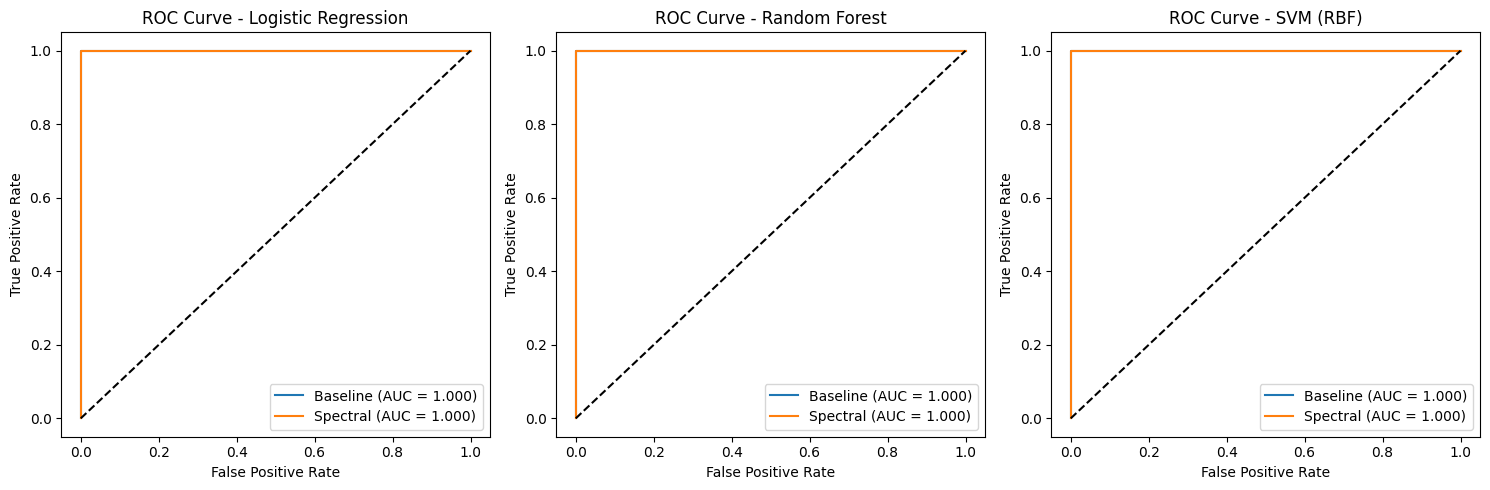

<Figure size 640x480 with 0 Axes>

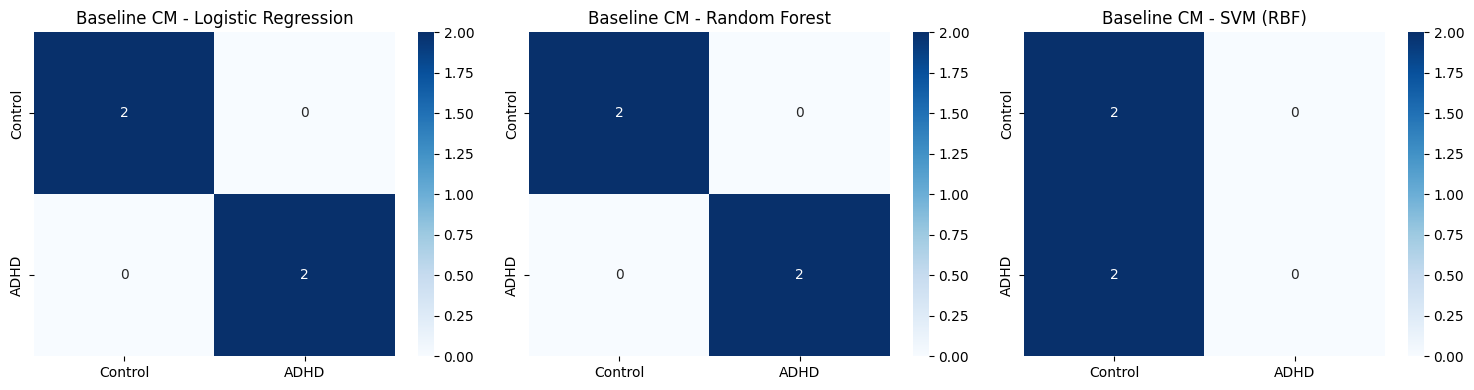

<Figure size 640x480 with 0 Axes>

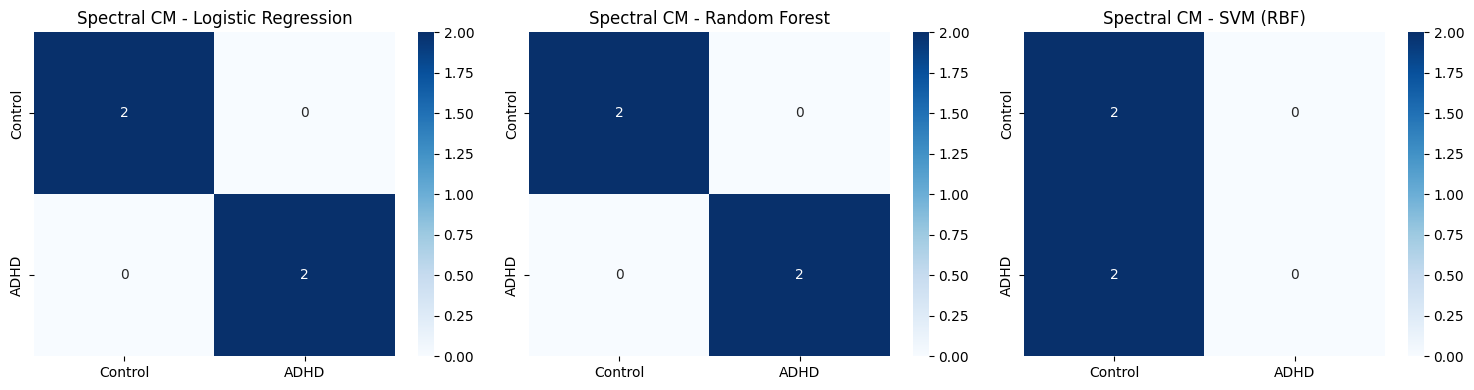

<Figure size 640x480 with 0 Axes>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use in-memory data from previous cells
# Split data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_spectral, y_spectral, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True)
}

results_baseline = {}
results_spectral = {}
for name, model in models.items():
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test_b)
    y_prob_b = model.predict_proba(X_test_b)[:, 1]
    cm_b = confusion_matrix(y_test_b, y_pred_b)
    results_baseline[name] = {'Confusion Matrix': cm_b, 'AUC': roc_auc_score(y_test_b, y_prob_b), 'y_prob': y_prob_b}
    
    model.fit(X_train_s, y_train_s)
    y_pred_s = model.predict(X_test_s)
    y_prob_s = model.predict_proba(X_test_s)[:, 1]
    cm_s = confusion_matrix(y_test_s, y_pred_s)
    results_spectral[name] = {'Confusion Matrix': cm_s, 'AUC': roc_auc_score(y_test_s, y_prob_s), 'y_prob': y_prob_s}

# ROC Curves
plt.figure(figsize=(15, 5))
for i, name in enumerate(models.keys()):
    fpr_b, tpr_b, _ = roc_curve(y_test_b, results_baseline[name]['y_prob'])
    fpr_s, tpr_s, _ = roc_curve(y_test_s, results_spectral[name]['y_prob'])
    plt.subplot(1, 3, i+1)
    plt.plot(fpr_b, tpr_b, label=f'Baseline (AUC = {results_baseline[name]["AUC"]:.3f})')
    plt.plot(fpr_s, tpr_s, label=f'Spectral (AUC = {results_spectral[name]["AUC"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('roc_comparison.png')

# Confusion Matrices
plt.figure(figsize=(15, 4))
for i, name in enumerate(models.keys()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(results_baseline[name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'ADHD'], yticklabels=['Control', 'ADHD'])
    plt.title(f'Baseline CM - {name}')
plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_baseline.png')

plt.figure(figsize=(15, 4))
for i, name in enumerate(models.keys()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(results_spectral[name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'ADHD'], yticklabels=['Control', 'ADHD'])
    plt.title(f'Spectral CM - {name}')
plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_spectral.png')

In [5]:
# Single-sample inference with spectral features
sample_idx = 0
X_test_s_sample = X_test_s[sample_idx:sample_idx+1]
true_label = y_test_s[sample_idx]
for name, model in models.items():
    pred = model.predict(X_test_s_sample)[0]
    prob = model.predict_proba(X_test_s_sample)[0, 1]
    print(f'{name}')
    print(f'Predicted: {"Control" if pred == 0 else "ADHD"}, Probability: {prob:.4f}, True Label: {"Control" if true_label == 0 else "ADHD"}')

Logistic Regression
Predicted: Control, Probability: 0.0152, True Label: Control
Random Forest
Predicted: Control, Probability: 0.1700, True Label: Control
SVM (RBF)
Predicted: Control, Probability: 0.2288, True Label: Control
